In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Load our classifiers
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
l_eye_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lefteye_2splits.xml")
smile_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_smile.xml")

In [ ]:
!wget https://previews.123rf.com/images/pixelrobot/pixelrobot1906/pixelrobot190600009/125206998-slim-black-pointed-sunglasses-front-view-cut-out-on-white-.jpg -O sunglasses.jpg
!wget https://s.clipartkey.com/mpngs/s/6-69202_moustache-clipart-free-clipart-images-mexican-clipart-mustache.png -O moustaches.jpg

--2020-09-13 13:41:29--  https://w2.pngwave.com/png/894/451/647/surgical-mask-medical-mask-covid19-coronavirus-aqua-plastic-turquoise-plastic-bag-rectangle-png-clip-art.png
Resolving w2.pngwave.com (w2.pngwave.com)... 172.67.152.148, 104.28.21.203, 104.28.20.203, ...
Connecting to w2.pngwave.com (w2.pngwave.com)|172.67.152.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79656 (78K) [image/png]
Saving to: ‘mask.jpg’

mask.jpg            100%[===================>]  77.79K  --.-KB/s    in 0.04s   

2020-09-13 13:41:30 (2.17 MB/s) - ‘mask.jpg’ saved [79656/79656]

--2020-09-13 13:41:30--  https://previews.123rf.com/images/pixelrobot/pixelrobot1906/pixelrobot190600009/125206998-slim-black-pointed-sunglasses-front-view-cut-out-on-white-.jpg
Resolving previews.123rf.com (previews.123rf.com)... 23.218.33.205
Connecting to previews.123rf.com (previews.123rf.com)|23.218.33.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55728 (54K) [ima

In [ ]:
!wget https://img.freepik.com/free-photo/front-view-girl-smiling-camera_23-2148227929.jpg?size=626&ext=jpg - O girl1.jpg
!wget https://i.pinimg.com/originals/3c/15/9d/3c159da8c69c43caedc477d4a0b2191e.jpg -O girl2.jpg

In [ ]:
face_mask = cv2.imread('mask.jpg') 
scaling_factor = 1

# Load video
vid_location = "Video.mp4"
cap = cv2.VideoCapture(vid_location)
ret, frame = cap.read()

# Grab the width and height of the input video
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Create the video writer for MP4 format
out = cv2.VideoWriter('outpy.mp4', cv2.VideoWriter_fourcc(*'MP4V'), 20.0, (frame_width,frame_height))

while True:
  ret, frame = cap.read()
  if ret:
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face_rects = face_classifier.detectMultiScale(gray, 1.3, 5)    

    for (x,y,w,h) in face_rects:        
        if h > 0 and w > 0:    

          h, w = int(1.4*h), int(1.2*w)
          y += 25
          x -= 17
          
          frame_roi = frame[y:y+h, x:x+w]
          
          face_mask_small = cv2.resize(face_mask, (w, h),  interpolation=cv2.INTER_AREA)
          gray_mask = cv2.cvtColor(face_mask_small, cv2.COLOR_BGR2GRAY)

          ret, mask = cv2.threshold(gray_mask, 244, 255,  cv2.THRESH_BINARY_INV)
          mask_inv = cv2.bitwise_not(mask)
          masked_face = cv2.bitwise_and(face_mask_small, face_mask_small, mask=mask)
          
          masked_frame = cv2.bitwise_and(frame_roi,  frame_roi, mask=mask_inv)
          frame[y:y+h, x:x+w] = cv2.add(masked_face,  masked_frame)

    out.write(frame)
  else:
    break
  
cap.release()
out.release()
cv2.destroyAllWindows()

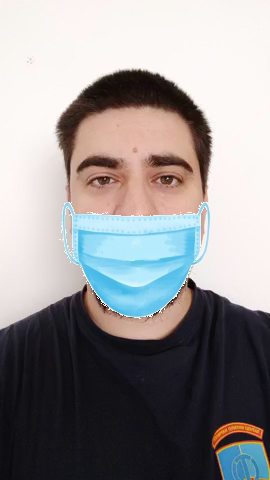

In [ ]:
face_mask = cv2.imread('mask.jpg') 
h_mask, w_mask = face_mask.shape[:2]
scaling_factor = 1

# Load video
vid_location = "Video.mp4"
cap = cv2.VideoCapture(vid_location)
ret, frame = cap.read()    

frame = cv2.resize(frame, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

face_rects = face_classifier.detectMultiScale(gray, 1.3, 5)    

for (x,y,w,h) in face_rects:        
    if h > 0 and w > 0:    

      h, w = int(1.4*h), int(1.2*w)
      y += 25
      x -= 17
       
      frame_roi = frame[y:y+h, x:x+w]
      
      face_mask_small = cv2.resize(face_mask, (w, h),  interpolation=cv2.INTER_AREA)
      gray_mask = cv2.cvtColor(face_mask_small, cv2.COLOR_BGR2GRAY)

      ret, mask = cv2.threshold(gray_mask, 244, 255,  cv2.THRESH_BINARY_INV)
      mask_inv = cv2.bitwise_not(mask)
      masked_face = cv2.bitwise_and(face_mask_small, face_mask_small, mask=mask)

      masked_frame = cv2.bitwise_and(frame_roi,  frame_roi, mask=mask_inv)
      frame[y:y+h, x:x+w] = cv2.add(masked_face,  masked_frame)
      cv2_imshow(frame)


In [ ]:
img = cv2.imread("girl1.jpg")

moustaches = cv2.imread('moustaches.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

smile_rects = smile_classifier.detectMultiScale(gray, 1.8, 20)    
for (x,y,w,h) in smile_rects:        
  if h > 0 and w > 0:
    h, w = int(2*h), int(1.5*w)
    y -= 40
    x-= 40
    
    img_roi = img[y:y+h, x:x+w]

    moustaches_small = cv2.resize(moustaches, (w, h),  interpolation=cv2.INTER_AREA)
    gray_moust = cv2.cvtColor(moustaches_small, cv2.COLOR_BGR2GRAY)

    ret, mask = cv2.threshold(gray_moust, 20, 255,  cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)
    masked_face = cv2.bitwise_and(moustaches_small, moustaches_small, mask=mask)
    
    masked_frame = cv2.bitwise_and(img_roi,  img_roi, mask=mask_inv)
    img[y:y+h, x:x+w] = cv2.add(masked_face,  masked_frame)

cv2_imshow(img)

error: ignored

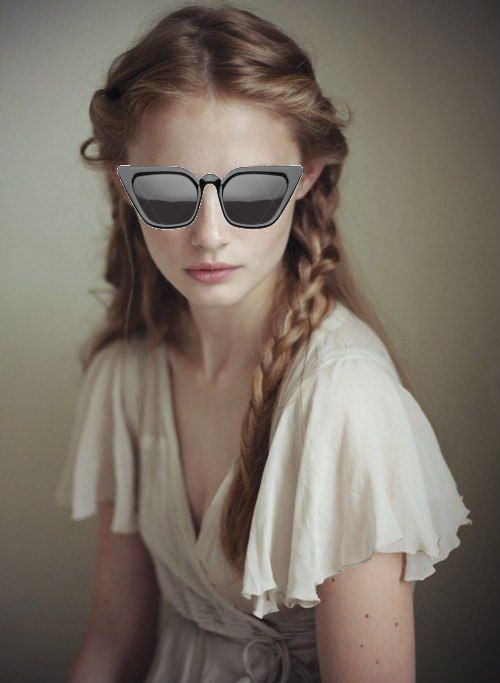

In [ ]:
img = cv2.imread("girl2.jpg")

sunglasses = cv2.imread('sunglasses.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

eye = l_eye_classifier.detectMultiScale(gray, 1.3, 9)    
for (x,y,w,h) in eye:        
  if h > 0 and w > 0:
    h, w = int(3*h), int(4.5*w)
    y -= 30
    x -= 130
    
    
    img_roi = img[y:y+h, x:x+w]

    sunglasses_small = cv2.resize(sunglasses, (w, h),  interpolation=cv2.INTER_AREA)
    gray_sunglasses = cv2.cvtColor(sunglasses_small, cv2.COLOR_BGR2GRAY)

    ret, mask = cv2.threshold(gray_sunglasses, 230, 255,  cv2.THRESH_BINARY_INV)
    mask_inv = cv2.bitwise_not(mask)
    masked_face = cv2.bitwise_and(sunglasses_small, sunglasses_small, mask=mask)
    
    masked_frame = cv2.bitwise_and(img_roi,  img_roi, mask=mask_inv)
    img[y:y+h, x:x+w] = cv2.add(masked_face,  masked_frame)

cv2_imshow(img)